In [1]:
%matplotlib inline

In [2]:
# categorical data is data that is logically grouped by various values,
# typically strings. these are referred to as categories.

In [3]:
import numpy as np
import pandas as pd

# baby name popularity by year
url = 'https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv'

# the first row here means that in 1880, 8.2% of boys born were named John
bn = pd.read_csv(url)
bn.head()

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


In [4]:
bn['sex'] = bn['sex'].astype('category')
bn['sex'].dtype

CategoricalDtype(categories=['boy', 'girl'], ordered=False)

In [5]:
# what years does this cover?
bn['year'].min(), bn['year'].max()

(1880, 2008)

In [6]:
# index by year
bn = bn.set_index('year')

In [7]:
# data for one year
bn.loc[1969].head()

,name,percent,sex
year,,,
1969,Michael,0.046564,boy
1969,David,0.034811,boy
1969,James,0.032760,boy
1969,John,0.032121,boy
1969,Robert,0.031880,boy


In [8]:
# how many rows?
len(bn)

258000

In [9]:
# just the names
bn['name'].head()

year
1880       John
1880    William
1880      James
1880    Charles
1880     George
Name: name, dtype: object

In [10]:
# make the data gender-neutral
# right now it's categorized into girls and boys
bn['sex'].dtype

CategoricalDtype(categories=['boy', 'girl'], ordered=False)

In [11]:
bn[bn['name'] == 'Joe'].groupby('sex').sum()

,percent
sex,
boy,0.508141
girl,0.009856


In [12]:
bn[bn['name'] == 'Joseph'].groupby('sex').sum()

,percent
sex,
boy,2.292487
girl,0.007306


In [13]:
# group by everything but sex
# this produces a hierarchical index with name and year levels
gn = bn.groupby(['name','year']).sum()
gn.head(20)

percent
name    year          
Aaden   2008  0.000442
Aaliyah 1994  0.000744
        1995  0.000653
        1996  0.000434
        1997  0.000911
        1998  0.000722
        1999  0.000559
        2000  0.000750
        2001  0.001694
        2002  0.002422
        2003  0.001831
        2004  0.001726
        2005  0.001703
        2006  0.001790
        2007  0.001870
        2008  0.001939
Aarav   2008  0.000101
Aaron   1880  0.000861
        1881  0.000868
        1882  0.000697

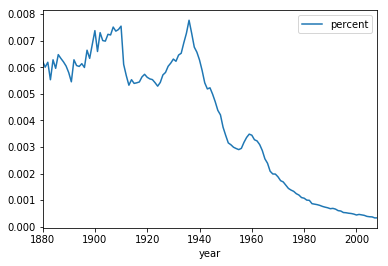

In [14]:
# how popular is the name "Joe" over the years?
joes = gn.loc['Joe']
joes.plot();

In [15]:
# in what year was "Joe" most popular?
joes['percent'].idxmax()

1936

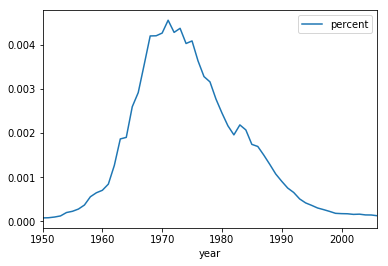

In [16]:
def name_series(name):
    return gn.loc[name]

def peak_year(name):
    s = name_series(name)['percent']
    return s.idxmax()

name_series('Stacey').plot();

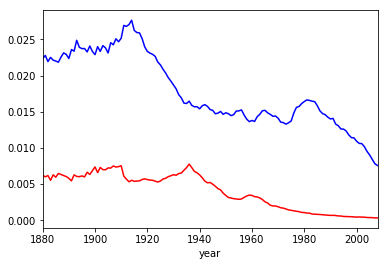

In [17]:
# visually compare Joe and Joseph
ax = name_series('Joe').plot(legend=False, color='red');
name_series('Joseph').plot(legend=False, color='blue', ax=ax);

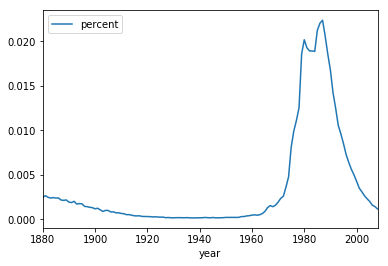

In [18]:
name_series('Amanda').plot();

In [19]:
peak_year('Amanda')

1987